# Import packages and data

In [1]:
# Import packages
%matplotlib notebook

# Import 
import copy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
## Import data from Snyderome - batch 1
df_1neg = pd.read_csv(
    filepath_or_buffer='C:/Users/Brooke/Documents/MIT/Research/Alm_Lab/Data-Snyderome/serum_metabolomics_data/results_for_first_batch_negative_mode_reformat.csv',  
    sep=',',index_col=0)

df_1pos = pd.read_csv(
    filepath_or_buffer='C:/Users/Brooke/Documents/MIT/Research/Alm_Lab/Data-Snyderome/serum_metabolomics_data/results_for_the_first_batch_positive_mode_reformat.csv',  
    sep=',',index_col=0)

#import data - batch 2
df_2neg = pd.read_csv(
    filepath_or_buffer='C:/Users/Brooke/Documents/MIT/Research/Alm_Lab/Data-Snyderome/serum_metabolomics_data/results_for_second_batch_negative_mode_reformat.csv',  
    sep=',',index_col=0)

# Clean up data

In [3]:
## function for cleaning up data    
def clean(df):
    #Clean up data: replace 1's (which are actually blanks) with 0.5*minimum for that feature
    nrows = len(df)
    ncols = int(df.size/len(df))
    df_min = df[df !=1].min(axis=1, skipna=1) #row minima excluding 1's
    df_clean = copy.deepcopy(df)
    for i in range(0, nrows):
        for j in range(0, ncols):
            if df.iloc[i,j]==1:
                df_clean.iloc[i,j]=df_min.iloc[i]*0.5    
    #df_clean contains 1's replaced with half of the minimum in the row (excluding 1's in minimum calculation)

    ## Clean up data: Z-score across features (features have same weight now)
    df_z = stats.zscore(df, axis=1, ddof=1)
    #df_z contains z-scored data
    
    return df_clean, df_z

In [4]:
## Call function to clean the data
df_clean_1neg, df_z_1neg = clean(df_1neg)
df_clean_1pos, df_z_1pos = clean(df_1pos)

# PCA 

In [5]:
## Define PCA function
y = np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]) #each replicate within one day has the same number
target_names = np.array(['day1','day2','day3','day5','day6'])
colors = ['b', 'm', 'c', 'r', 'g']
lw = 2

def myPCAfunc(X,title):
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)

    # Percentage of variance explained for each components
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()

    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    
    plt.show()

explained variance ratio (first two components): [ 0.50225331  0.23129235]


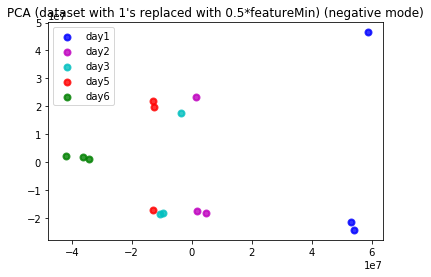

explained variance ratio (first two components): [ 0.49469524  0.21587292]


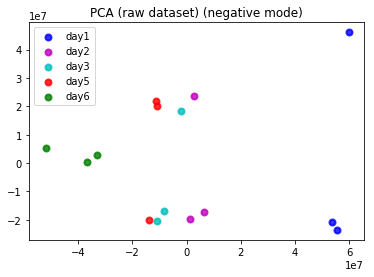

explained variance ratio (first two components): [ 0.29773915  0.19087812]


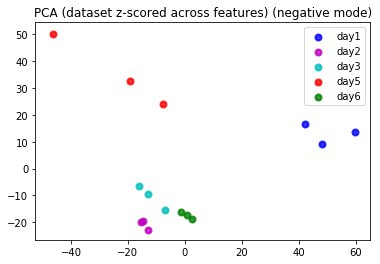

explained variance ratio (first two components): [ 0.70716932  0.09143739]


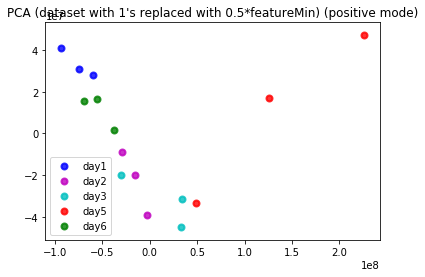

explained variance ratio (first two components): [ 0.69855198  0.09145712]


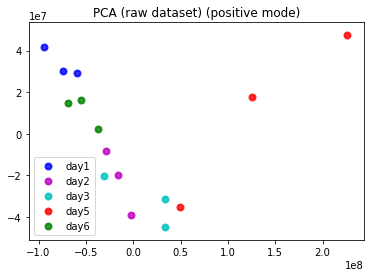

explained variance ratio (first two components): [ 0.2394364   0.15322767]


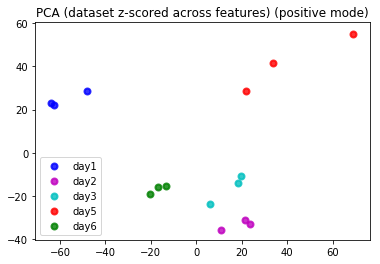

In [6]:
## Run PCA function for differently-cleaned data
myPCAfunc( df_clean_1neg.transpose(), "PCA (dataset with 1's replaced with 0.5*featureMin) (negative mode)" )
myPCAfunc( df_1neg.transpose(), 'PCA (raw dataset) (negative mode)' )
myPCAfunc( df_z_1neg.transpose(), 'PCA (dataset z-scored across features) (negative mode)' )

myPCAfunc( df_clean_1pos.transpose(), "PCA (dataset with 1's replaced with 0.5*featureMin) (positive mode)" )
myPCAfunc( df_1pos.transpose(), 'PCA (raw dataset) (positive mode)' )
myPCAfunc( df_z_1pos.transpose(), 'PCA (dataset z-scored across features) (positive mode)' )


# Average values for each feature 
    ## separate for the number of times the feature shows up
## Plot as histograms 
## Or plot as density curves

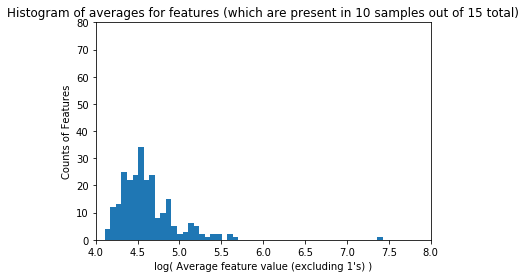

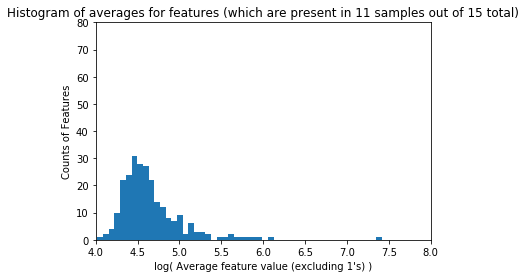

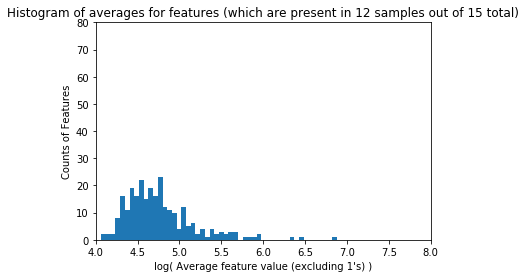

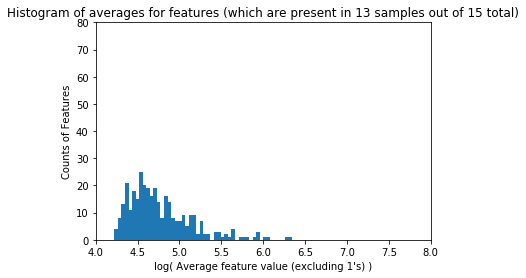

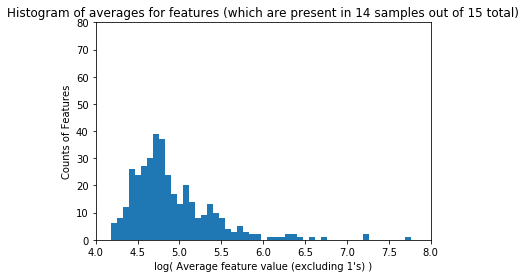

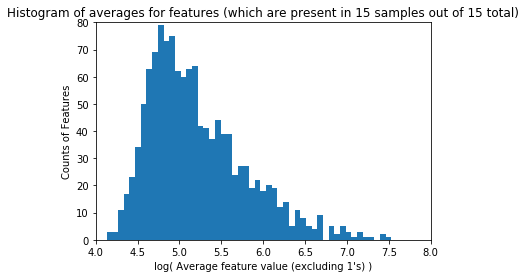

In [7]:
## Average values for each feature
## exclude from the average values that are 1's (really, 1's are blanks) and plot frequency vs avg value

featavg = df_1neg[df_1neg !=1].mean(axis=1, skipna=1) #row (feature) average excluding 1's
log_featavg = np.log10(featavg)
featcount = (df_1neg !=1).sum(1) #number of times that feature had a value that wasn't 1

#For features which showed up in 10 samples, plot histogram of average value. Repeat for features that showed up 11,..,15 times
for i in range(min(featcount), max(featcount)+1):
    plt.figure()
    plt.hist(log_featavg[featcount==i],bins=50)#'auto')
    plt.xlabel("log( Average feature value (excluding 1's) )")
    plt.xlim([4,8])
    plt.ylim({0,80})
    plt.ylabel('Counts of Features')
    plt.title('Histogram of averages for features (which are present in %i samples out of 15 total)' % i)
    plt.show()
    
    

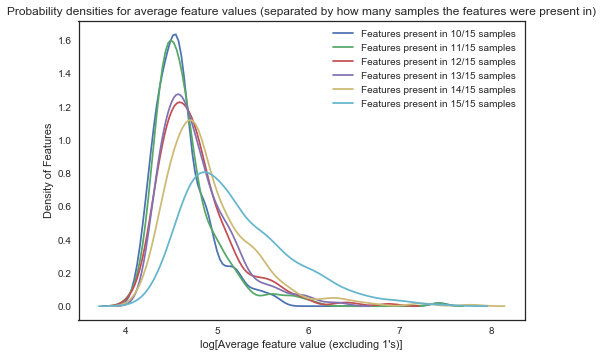

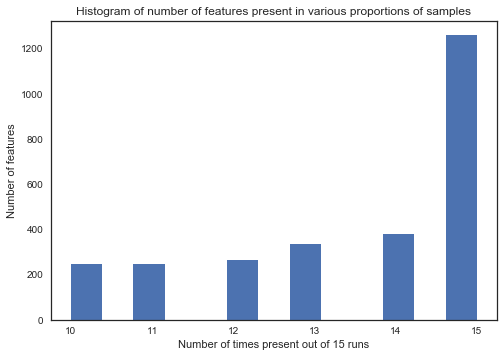

In [38]:
## Above average vs counts as DENSITY PLOT 
## [Average values for each feature; exclude from the average values that are 1's; plot against how often present]

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("white")

plt.figure()
#Do the above but make a density plot
for i in range(min(featcount), max(featcount)+1):
    sns.distplot(log_featavg[featcount==i], hist=False, label = 'Features present in %i/15 samples' %i) #new
    plt.xlabel("log[Average feature value (excluding 1's)]")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Probability densities for average feature values (separated by how many samples the features were present in)')
plt.show()

#plot a figure showing the number of features in each category (10/15, 11/15, 12/15, 13/15, 14/15, 15/15)
plt.hist(featcount,bins='auto')
plt.xlabel("Number of times present out of 15 runs")
plt.ylabel('Number of features')
plt.title('Histogram of number of features present in various proportions of samples')
plt.show()

#drawback: because normalized, this does not give information about how often features are present 15/15, 14/15, etc. times

# RT or m/z for each feature 
    ## separate for the number of times the feature shows up
## Plot as histogram
## Or plot as density curves

### Same as above, but x-axis is now RT or m/z

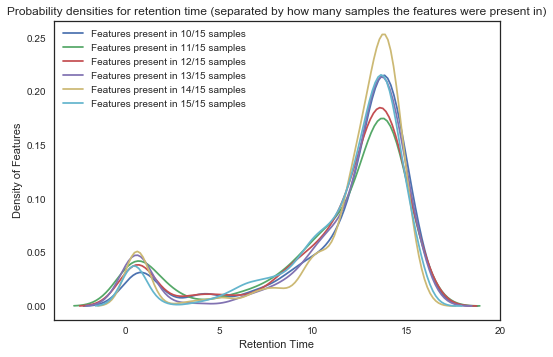

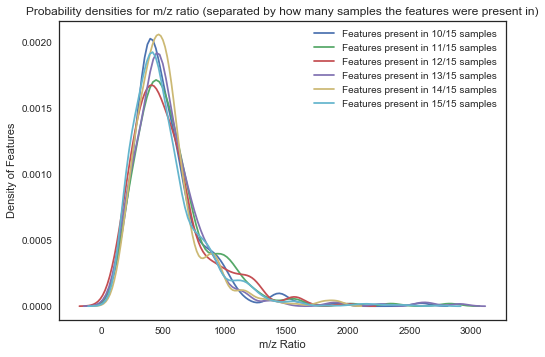

In [19]:
## Frequency vs rt or mz 
# [like above but rt or mz instead of avg value]

features = list(df_1neg.index) #extract mz@rt from the df row labels
mz = [i.split('@')[0] for i in features] #split the feature into mz
rt = [i.split('@')[1] for i in features] #split the feature into rt

#convert rt from a list of strings to an array of floats
rt = [float(i) for i in rt]
rt = np.asarray(rt)

#convert mz from a list of strings to an array of floats
mz = [float(i) for i in mz]
mz = np.asarray(mz)


#plot against rt
plt.figure()
for i in range(min(featcount), max(featcount)+1):
    sns.distplot(rt[featcount==i], hist=False, label = 'Features present in %i/15 samples' %i) #new
    plt.xlabel("Retention Time")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Probability densities for retention time (separated by how many samples the features were present in)')
plt.show()
    
#plot against m/z    
plt.figure()
for i in range(min(featcount), max(featcount)+1):
    sns.distplot(mz[featcount==i], hist=False, label = 'Features present in %i/15 samples' %i) #new
    plt.xlabel("m/z Ratio")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Probability densities for m/z ratio (separated by how many samples the features were present in)')
plt.show()

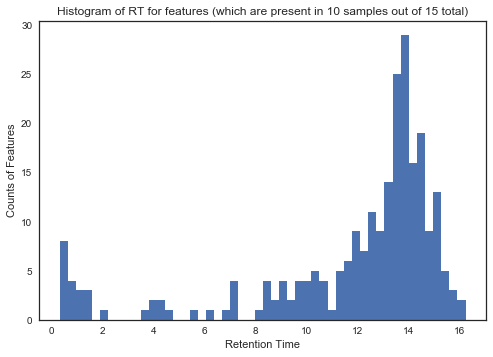

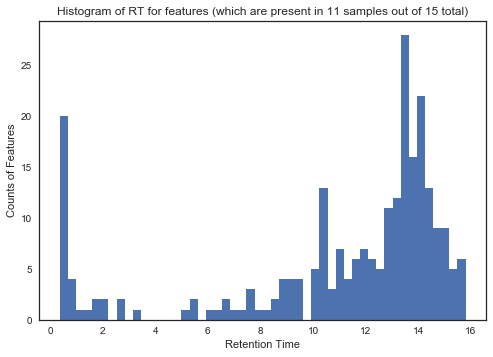

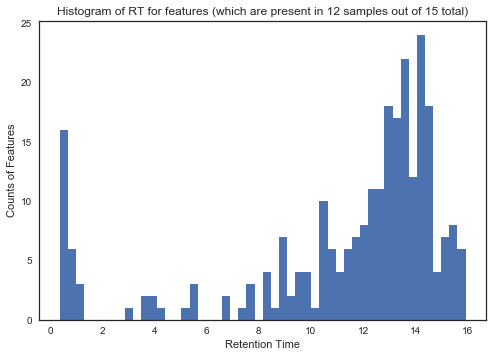

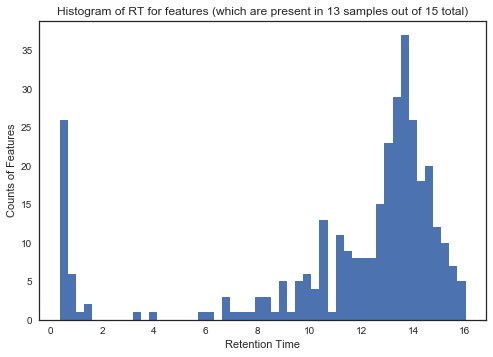

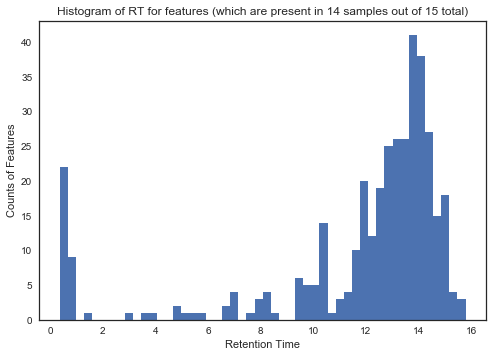

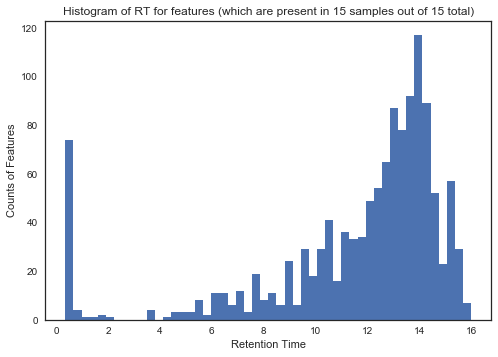

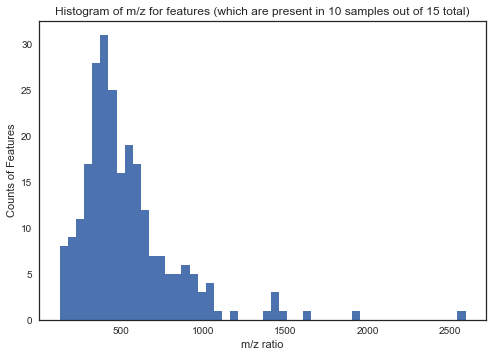

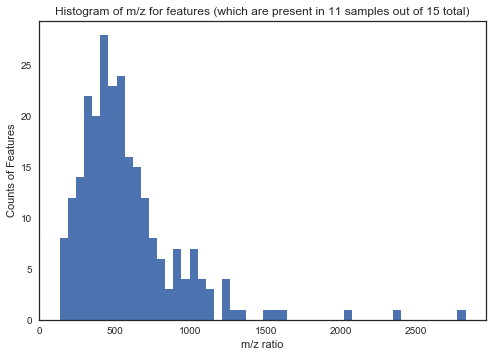

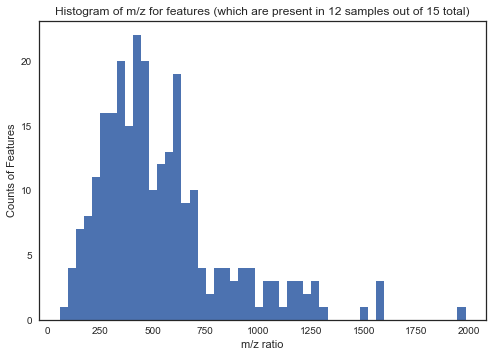

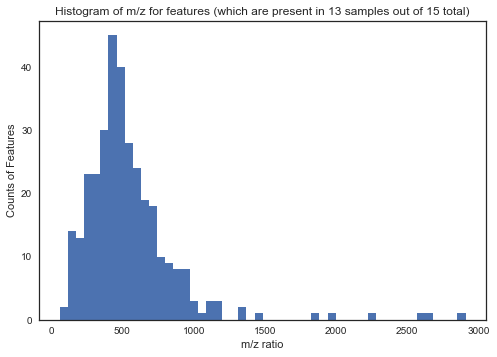

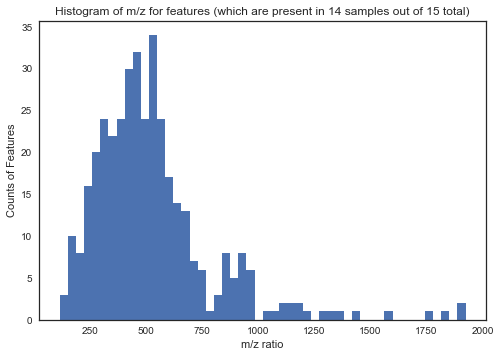

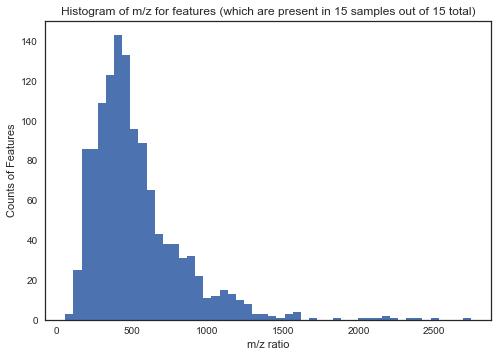

In [20]:
##plot like the above but as histograms, not density curves
#against rt
for i in range(min(featcount), max(featcount)+1):
    plt.figure()
    plt.hist(rt[featcount==i],bins=50)#'auto')
    plt.xlabel("Retention Time")
    #plt.xlim([4,8])
    #plt.ylim({0,80})
    plt.ylabel('Counts of Features')
    plt.title('Histogram of RT for features (which are present in %i samples out of 15 total)' % i)
    plt.show()
    
#against mz
for i in range(min(featcount), max(featcount)+1):
    plt.figure()
    plt.hist(mz[featcount==i],bins=50)#'auto')
    plt.xlabel("m/z ratio")
    #plt.xlim([4,8])
    #plt.ylim({0,80})
    plt.ylabel('Counts of Features')
    plt.title('Histogram of m/z for features (which are present in %i samples out of 15 total)' % i)
    plt.show()
    

# Do the above density plots (average value, RT, m/z) for batch 2 data

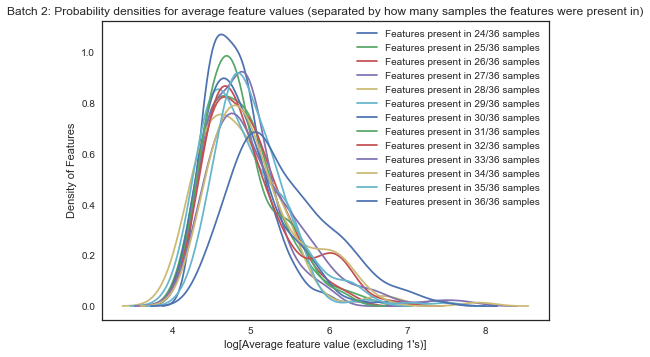

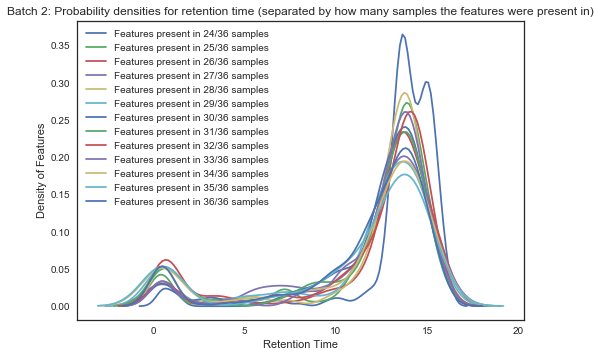

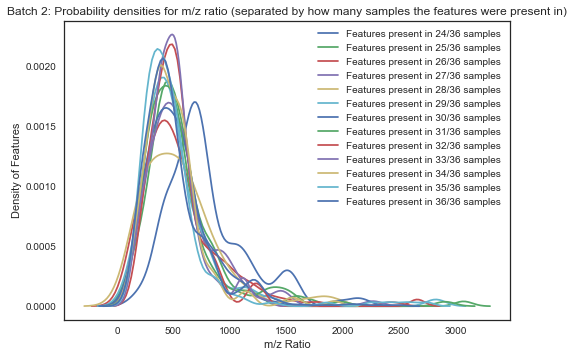

In [21]:
##Do the above density plots for batch 2 data 

#average intensity for features and frequency of occurance
featavg2 = df_2neg[df_2neg !=1].mean(axis=1, skipna=1) #row (feature) average excluding 1's
log_featavg2 = np.log10(featavg2)
featcount2 = (df_2neg !=1).sum(1) #number of times that feature had a value that wasn't 1


# intensity vs count
plt.figure()
for i in range(min(featcount2), max(featcount2)+1):
    sns.distplot(log_featavg2[featcount2==i], hist=False, label = 'Features present in %i/36 samples' %i) #new
    plt.xlabel("log[Average feature value (excluding 1's)]")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Batch 2: Probability densities for average feature values (separated by how many samples the features were present in)')
plt.show()


# rt/mz vs count
features2 = list(df_2neg.index) #extract mz@rt from the df row labels
mz2 = [i.split('@')[0] for i in features2] #split the feature into mz
rt2 = [i.split('@')[1] for i in features2] #split the feature into rt
#convert rt from a list of strings to an array of floats
rt2 = [float(i) for i in rt2]
rt2 = np.asarray(rt2)
#convert mz from a list of strings to an array of floats
mz2 = [float(i) for i in mz2]
mz2 = np.asarray(mz2)

#plot against rt
plt.figure()
for i in range(min(featcount2), max(featcount2)+1):
    sns.distplot(rt2[featcount2==i], hist=False, label = 'Features present in %i/36 samples' %i) #new
    plt.xlabel("Retention Time")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Batch 2: Probability densities for retention time (separated by how many samples the features were present in)')
plt.show()
    
#plot against m/z    
plt.figure()
for i in range(min(featcount2), max(featcount2)+1):
    sns.distplot(mz2[featcount2==i], hist=False, label = 'Features present in %i/36 samples' %i) #new
    plt.xlabel("m/z Ratio")
    plt.ylabel('Density of Features') #area under the curve is 1
    plt.title('Batch 2: Probability densities for m/z ratio (separated by how many samples the features were present in)')
plt.show()

# Compare Batch1 and Batch2 (average value, RT, m/z)
## See that the batches are similar in where most of the reads are (same RT, m/z and value ranges)

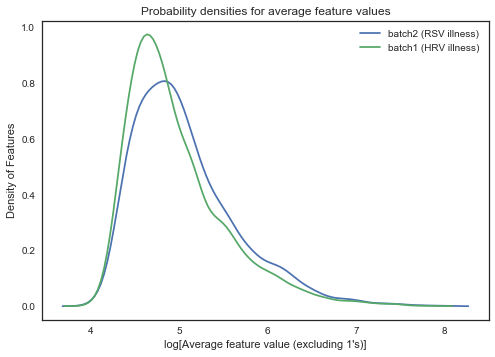

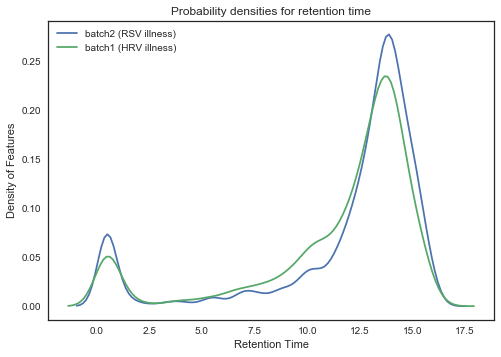

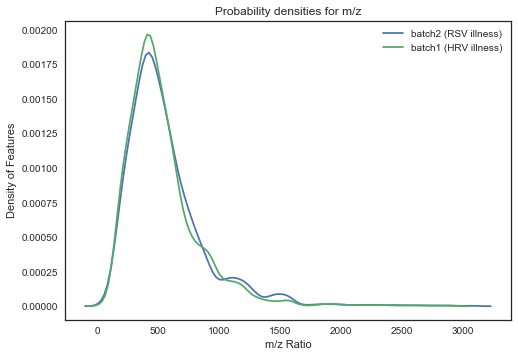

In [22]:
## Compare batch1 and batch2

#average feature value vs density of features
plt.figure()
#batch2
sns.distplot(log_featavg2, hist=False, label = 'batch2 (RSV illness)') 
#batch1
sns.distplot(log_featavg, hist=False, label = 'batch1 (HRV illness)') 
#label
plt.xlabel("log[Average feature value (excluding 1's)]")
plt.ylabel('Density of Features') #area under the curve is 1
plt.title('Probability densities for average feature values')
plt.show()

#rt vs density of features
plt.figure()
#batch2
sns.distplot(rt2, hist=False, label = 'batch2 (RSV illness)') 
#batch1
sns.distplot(rt, hist=False, label = 'batch1 (HRV illness)') 
#label
plt.xlabel("Retention Time")
plt.ylabel('Density of Features') #area under the curve is 1
plt.title('Probability densities for retention time')
plt.show()

#mz vs density of features
plt.figure()
#batch2
sns.distplot(mz2, hist=False, label = 'batch2 (RSV illness)') 
#batch1
sns.distplot(mz, hist=False, label = 'batch1 (HRV illness)') 
#label
plt.xlabel("m/z Ratio")
plt.ylabel('Density of Features') #area under the curve is 1
plt.title('Probability densities for m/z')
plt.show()


#this is very interesting to note where most of the features come out (i.e. at what average values and what retention times and m/z's)

# CV

## Calculate mean and std just from values that aren't 1

## Calculate CV between REPLICATES (do separately for all 5 days) and
## calculate CV between DAYS using the average value for each replicate

## Part 1: Calculate CV

In [23]:
## Define function for calculating CV
def myCVfunc(X, title):
    
    # calculate mean and std just from the values that aren't 1
    std_detect = X[X!=1].std(1)
    mean_detect = X[X!=1].mean(1)
    CV_detect = std_detect/mean_detect

    # plot CV histogram
    plt.figure()
    plt.hist(CV_detect[np.logical_not(np.isnan(CV_detect))],bins=100)#'auto') #excludes nans
    plt.xlabel("CV Calculated with Only Detected Values (exclude 1's in calculation) (excludes nans from plot)")
    plt.ylabel('Counts of Features')
    plt.title(title)
    plt.show()
    
    return mean_detect, std_detect, CV_detect

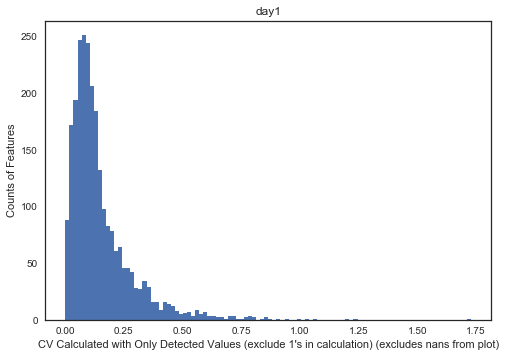

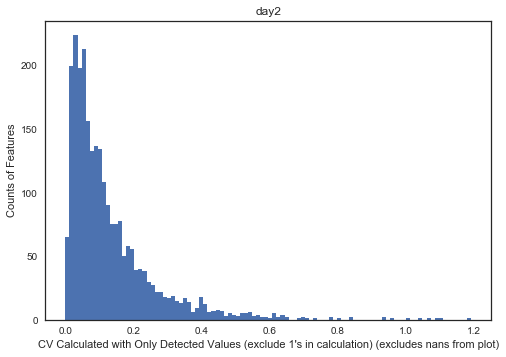

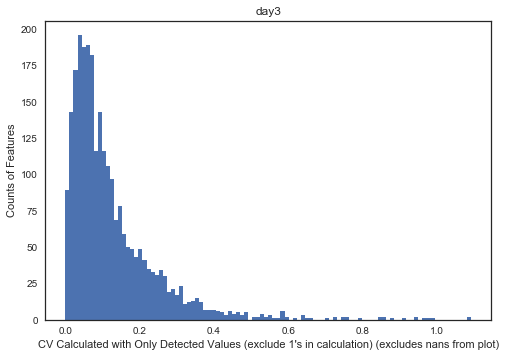

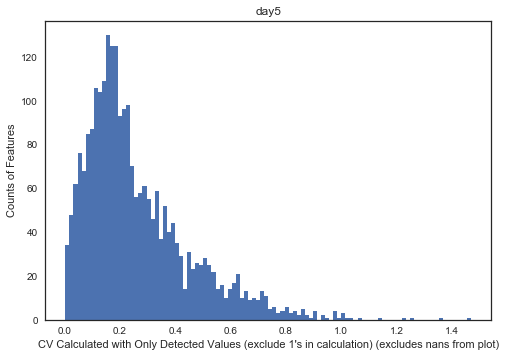

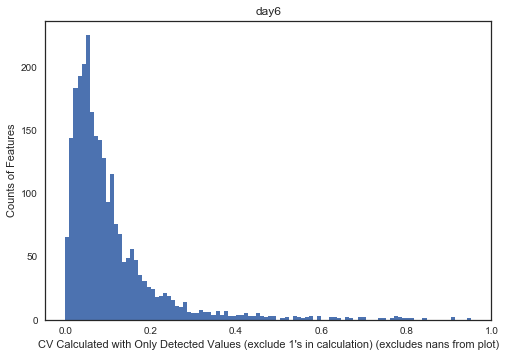

In [24]:
## Run CV-calculation function 
#For each day, calculate the CV for each feature.  See how CV varies within a single day for all the features.
day1 = df_1neg.iloc[:,0:3] 
day2 = df_1neg.iloc[:,3:6] 
day3 = df_1neg.iloc[:,6:9] 
day5 = df_1neg.iloc[:,9:12] 
day6 = df_1neg.iloc[:,12:15] 
dayDict = {'day1': day1, 'day2': day2, 'day3': day3, 'day5': day5, 'day6': day6}

mean_detectDict ={}
std_detectDict ={}
CV_detectDict ={}

days = ['day1', 'day2', 'day3', 'day5', 'day6']
for day in days:
    mean_detectDict[day], std_detectDict[day], CV_detectDict[day] = myCVfunc(dayDict[day],day)  
    

#print(len(CV_detectDict['day1']))
#print(CV_detectDict['day1'])


#For each rep, calculate the CV for each feature.  See how CV varies across days for all the features.
# rep1 = df_1neg.iloc[:,[0,3,6,9,12]]
# rep2 = df_1neg.iloc[:,[1,4,7,10,13]]
# rep3 = df_1neg.iloc[:,[2,5,8,11,14]] 
# repDict = {'rep1': rep1, 'rep2': rep2, 'rep3': rep3}
# reps = ['rep1', 'rep2', 'rep3']
# for rep in reps:
#     #print(day)
#     mean_detectDict[rep], std_detectDict[rep], CV_detectDict[rep] = myCVfunc(repDict[rep],rep) 

# for key in mean_detectDict:
#     print(key)

## Part 2: 
## Plot CV for technical replicates

### Issues with resulting plots: # Biggest peaks in m/z vs CV (e.g at mz = 500) are also where the most samples come out in the density plot above (that means that CV isn't very accurate for the day 1 CV calc b/c few samples to calculate CV from)
    ### Is this an issue here?

## Is there a better metric than CV to use?  (There is a max of 3 samples for a single day) 
    ### maybe plot m/z vs average value or all values??  Or use range (but range for 2 samples vs range for 100 samples have quite different meanings)?

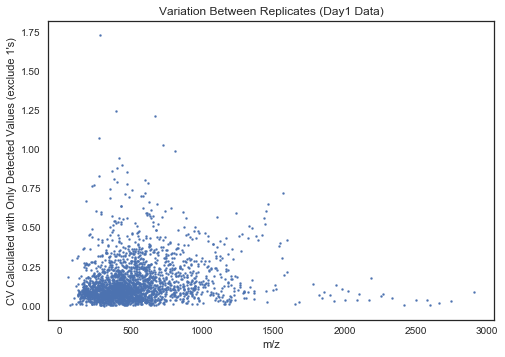

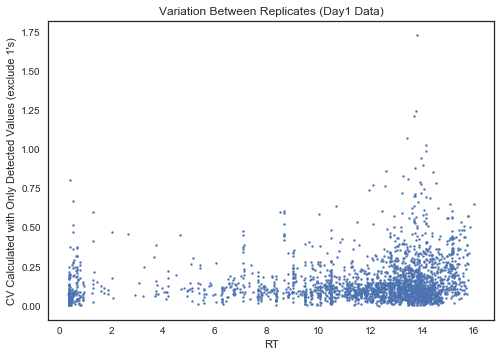

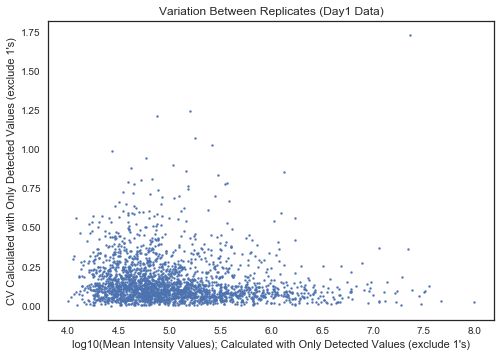

In [25]:
#plot mz vs CV and rt vs CV - start with Day 1 data
features = list(df_1neg.index) #extract mz@rt from the df row labels
mz = [i.split('@')[0] for i in features] #split the feature into mz
rt = [i.split('@')[1] for i in features] #split the feature into rt

plt.figure()
plt.scatter(mz, CV_detectDict['day1'], s=4)
plt.xlabel('m/z')
plt.ylabel("CV Calculated with Only Detected Values (exclude 1's)")
plt.title('Variation Between Replicates (Day1 Data)')
plt.show()

plt.figure()
plt.scatter(rt, CV_detectDict['day1'],s=4)
plt.xlabel('RT')
plt.ylabel("CV Calculated with Only Detected Values (exclude 1's)")
plt.title('Variation Between Replicates (Day1 Data)')
plt.show()

plt.figure()
plt.scatter(np.log10(mean_detectDict['day1']), CV_detectDict['day1'], s=4)
plt.xlabel("log10(Mean Intensity Values); Calculated with Only Detected Values (exclude 1's)")
plt.ylabel("CV Calculated with Only Detected Values (exclude 1's)")
plt.title('Variation Between Replicates (Day1 Data)')
plt.show()

## Part 3:  
## Plot CV for days (using the value for a day that comes from averaging the technical replicates)

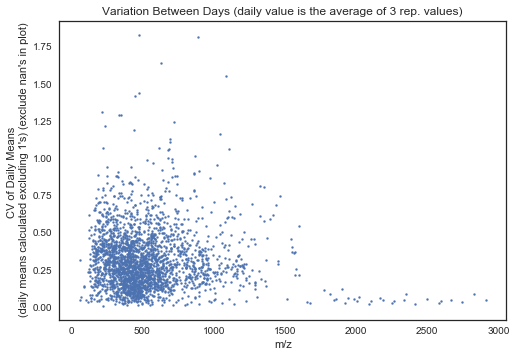

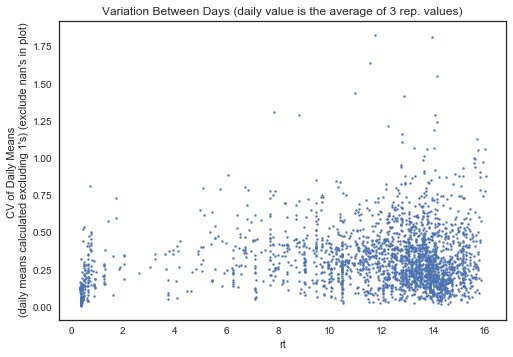

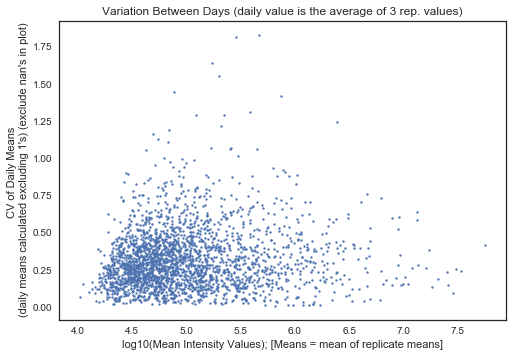

In [26]:
#Calculate the mean of daily means and the std of daily means for each feature.

meansofdays_detect = np.column_stack((mean_detectDict['day1'],mean_detectDict['day2'],mean_detectDict['day3'],mean_detectDict['day5'],mean_detectDict['day6']))

meanmean_detect = np.mean(meansofdays_detect,axis=1)
stdmean_detect = meansofdays_detect.std(1)
CVmean_detect = stdmean_detect/meanmean_detect

# Plot m/z vs CV
mz_array = np.asarray(mz)
plt.figure()
plt.scatter(mz_array[np.logical_not(np.isnan(CVmean_detect))], CVmean_detect[np.logical_not(np.isnan(CVmean_detect))], s=4)
plt.xlabel('m/z')
plt.ylabel("CV of Daily Means \n (daily means calculated excluding 1's) (exclude nan's in plot)")
plt.title('Variation Between Days (daily value is the average of 3 rep. values)')
plt.show()

#Plot RT vs CV
rt_array = np.asarray(rt)
plt.figure()
plt.scatter(rt_array[np.logical_not(np.isnan(CVmean_detect))], CVmean_detect[np.logical_not(np.isnan(CVmean_detect))],s=4)
plt.xlabel('rt')
plt.ylabel("CV of Daily Means \n (daily means calculated excluding 1's) (exclude nan's in plot)")
plt.title('Variation Between Days (daily value is the average of 3 rep. values)')
plt.show()

meanmean_array = np.asarray(meanmean_detect)
plt.figure()
plt.scatter(np.log10(meanmean_array[np.logical_not(np.isnan(CVmean_detect))]), CVmean_detect[np.logical_not(np.isnan(CVmean_detect))], s=4)
plt.xlabel("log10(Mean Intensity Values); [Means = mean of replicate means]")
plt.ylabel("CV of Daily Means \n (daily means calculated excluding 1's) (exclude nan's in plot)")
plt.title('Variation Between Days (daily value is the average of 3 rep. values)')
plt.show()

## Part 4:  
## Compare CV for technical replicates and CV for day-to-day variation

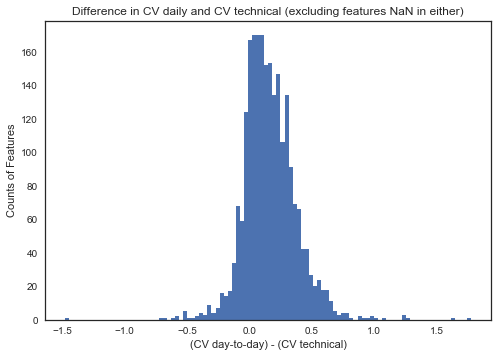

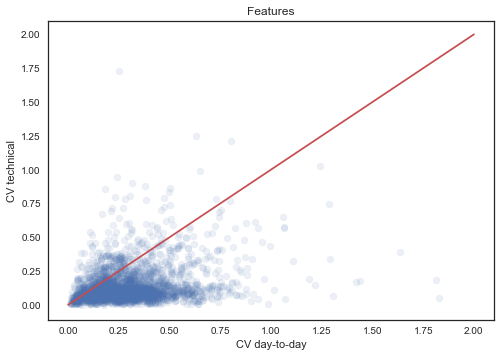

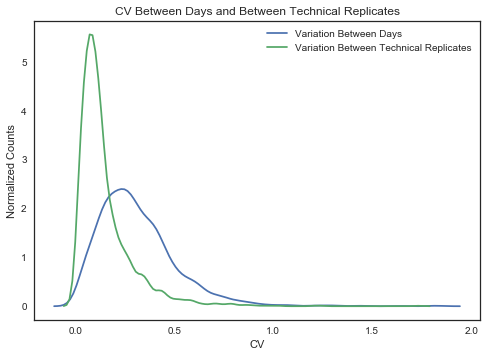

In [27]:
#technical variation
CV_technical = CV_detectDict['day1']#.dropna(axis=0, how='all')
    
#daily variation
CV_daily = pd.Series(CVmean_detect, index=CV_technical.index)#.dropna(axis=0, how='all')

#combine
CV = pd.concat([CV_technical, CV_daily], axis=1)
CV.columns = ['tech', 'day']

#remove features if NA in either column
CV_nonan = CV.dropna(axis=0, how='any')

#make list of features without the NA values
features_noCVnan = list(df_1neg.index) #extract mz@rt from the df row labels
mz_noCVnan = [i.split('@')[0] for i in features_noCVnan] #split the feature into mz

sns.set_style("white")
#sns.set_style("dark")

#plot difference in CVs for each feature (scatterplot)
plt.figure()
plt.hist(CV_nonan['day'] - CV_nonan['tech'], bins=100)#'auto')
plt.xlabel("(CV day-to-day) - (CV technical)")
plt.ylabel('Counts of Features')
plt.title('Difference in CV daily and CV technical (excluding features NaN in either)')
plt.show()

#plot CV_tech vs CV_day
plt.figure()
plt.scatter(CV_nonan['day'], CV_nonan['tech'], alpha=0.1)#, color = mz_noCVnan) #had issues with colorbar
#plt.colorbar()
#sc = plt.scatter(CV_nonan['day'], CV_nonan['tech'],vmin=min(mz_noCVnan), vmax=min(mz_noCVnan), color = mz_noCVnan,cmap=cm)
#plt.colorbar(sc)
plt.xlabel("CV day-to-day")
plt.ylabel('CV technical')
plt.title('Features')
plt.plot([0,2], [0,2], 'r') #add y=x line
plt.show()
    

#density plot of CV_tech and CV_day
import seaborn as sns
#sns.set(color_codes=True)
plt.figure()
sns.distplot(CV_nonan['day'], hist=False, label = 'Variation Between Days')  
sns.distplot(CV_nonan['tech'], hist=False, label = 'Variation Between Technical Replicates') 
plt.xlabel('CV')
plt.ylabel('Normalized Counts')
plt.title('CV Between Days and Between Technical Replicates')
plt.show()

In [35]:
#look at where identified features fall:
## Import data from Snyderome negative names
df_1neg_names = pd.read_csv(
    filepath_or_buffer='C:/Users/Brooke/Documents/MIT/Research/Alm_Lab/Data-Snyderome/serum_metabolomics_data/results_for_first_batch_negative_mode_names2.csv',  
    sep=',',index_col=0, encoding='latin1')


CV_diff_name = pd.concat([CV_nonan['day'] - CV_nonan['tech'], df_1neg_names], axis=1)

CV_diff_name_order = CV_diff_name.sort_values(CV_diff_name.columns[0],axis=0, ascending=False) 
CV_diff_name_order.columns = ['CV_day - CV_tech','Name']

CV_diff_name_order.head(50)


,CV_day - CV_tech,Name
474.2258@11.745181,1.778753,Methylprednisolone succinate - 11.745181
892.5375@13.967212,1.623826,C42 H80 N6 O10 S2
474.2253@10.994083,1.267452,Methylprednisolone succinate - 10.994083
448.1415@12.884401,1.253391,C13 H16 N14 O5
632.248@11.550462,1.249389,C33 H44 O8 S2
214.0301@7.835067,1.240574,C9 H10 O4 S - 7.835067
235.1572@12.264068,1.072924,C14 H21 N O2
226.1934@13.2511425,1.024929,5-methyl-2E-tridecenoic acid - 13.2511425
438.3699@14.0390005,0.996962,438.3699@14.0390005
530.4308@13.618933,0.974584,C30 H62 N2 O S2


# Heatmap

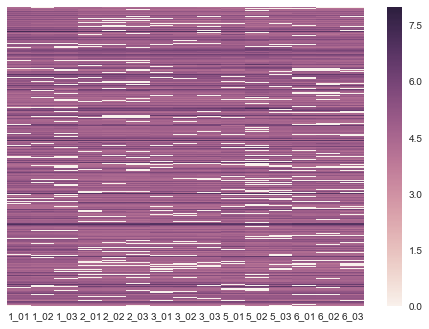

In [29]:
#heatmap
features = list(df_1neg.index) #extract mz@rt from the df row labels
mz = [i.split('@')[0] for i in features] #split the feature into mz
rt = [i.split('@')[1] for i in features] #split the feature into rt

temp = copy.deepcopy(df_1neg) #copy df_1neg
temp.index = rt #relabel the row labels to be rt

test = temp.sort_index(axis=0, ascending=False) #sort the rows to be in order of descending rt

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

ax = sns.heatmap(np.log10(test), yticklabels=False)
#heat map is descending order so the top row has the highest retention time and bottom row has lowest retention time



# Which features are in both batches/datasets?

In [30]:
#batch 1 features
features1= list(df_1neg.index) 
mz1 = [i.split('@')[0] for i in features1] 
rt1 = [i.split('@')[1] for i in features1] 
mz1 = [float(i) for i in mz1]
rt1 = [float(i) for i in rt1]

#batch2 features
features2= list(df_2neg.index)
mz2 = [i.split('@')[0] for i in features2] 
rt2 = [i.split('@')[1] for i in features2] 
mz2 = [float(i) for i in mz2]
rt2 = [float(i) for i in rt2]

#number of features
nfeatures_1 = len(mz1)
nfeatures_2 = len(mz2)

def matchingfeatures(cut):
    same = pd.DataFrame() #initialize empty matrix

    #set cutoff values for each mz and rt (COMPARING BATCH 2 to these BATCH 1-derived CUTOFFS)
    mz1_up = [x * (1+cut) for x in mz1]
    mz1_lo = [x * (1-cut) for x in mz1]
    rt1_up = [x * (1+cut) for x in rt1]
    rt1_lo = [x * (1-cut) for x in rt1]

    def makeint(temp):
        new = [int(x) for x in temp]
        return new

    for j in range(0, nfeatures_2):
        test1 = np.less(mz2[j], mz1_up) 
        test2 = np.greater(mz2[j], mz1_lo)
        test3 = np.less(rt2[j], rt1_up) 
        test4 = np.greater(rt2[j], rt1_lo)

        int1 = makeint(test1)
        int2 = makeint(test2)
        int3 = makeint(test3)
        int4 = makeint(test4)

        #test if all 4 conditions are true
        test = [a*b*c*d for a,b,c,d in zip(int1,int2,int3,int4)] 
        #add to 'same'
        same[j] = test

    same.index = features1
    same.columns = features2
    return same

In [31]:
same_5p = matchingfeatures(0.05) # 5% above and below

In [32]:
same_2p = matchingfeatures(0.05) # 2% above and below

In [33]:
same_10p = matchingfeatures(0.10) # 10% above and below

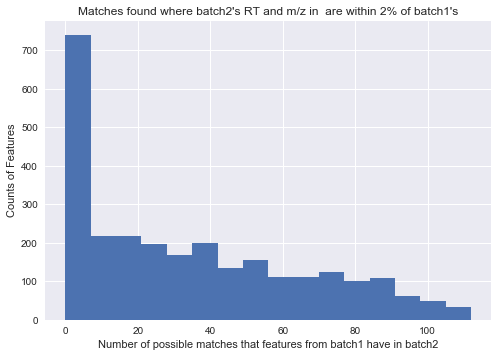

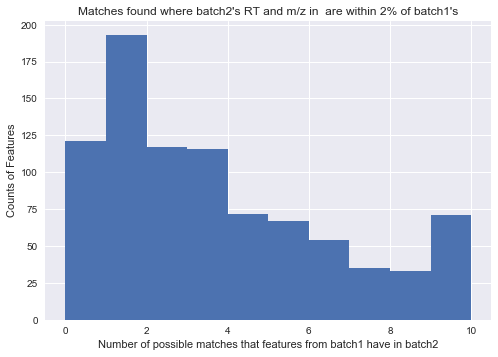

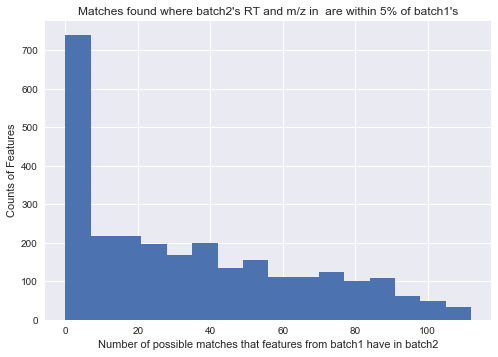

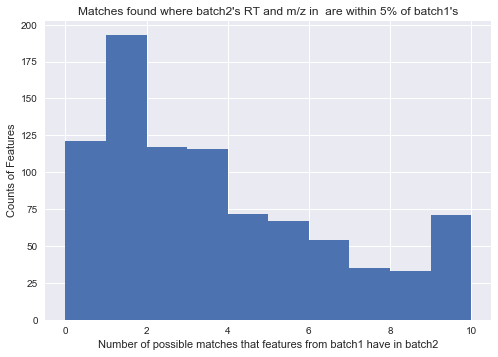

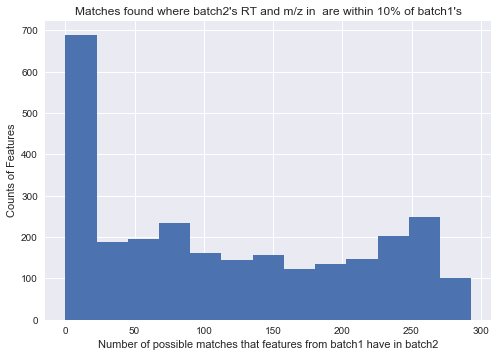

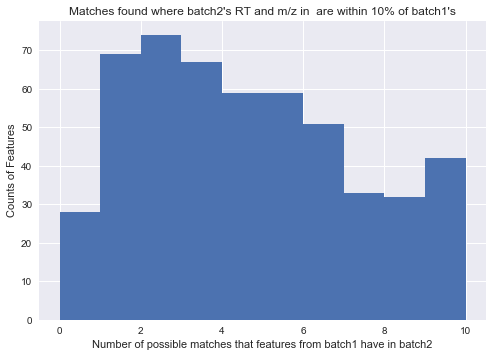

In [34]:
#analyze the data comparing batch 1 and batch 2

def plotmatches (same, str):
    feat1_matchesin2 = same.sum(axis=1)
    plt.figure()
    plt.hist(feat1_matchesin2,bins='auto')
    plt.xlabel("Number of possible matches that features from batch1 have in batch2")
    plt.ylabel('Counts of Features')
    plt.title("Matches found where batch2's RT and m/z in  are within "+ str+ " of batch1's")
    plt.show()
    
    #zoom in on less than 10 range
    plt.figure()
    plt.hist(feat1_matchesin2[feat1_matchesin2 <=10],bins=10)
    plt.xlabel("Number of possible matches that features from batch1 have in batch2")
    plt.ylabel('Counts of Features')
    plt.title("Matches found where batch2's RT and m/z in  are within "+ str+ " of batch1's")
    plt.show()
    
plotmatches(same_2p, '2%')
plotmatches(same_5p, '5%')
plotmatches(same_10p, '10%')

# Alternates to CV
## Show intensity for all values at a given m/z or given RT

In [ ]:
# Plot intensity values vs m/z

#axis1
fig, ax1 = plt.subplots()
ncols = int(df_1neg.size/len(df_1neg))
for i in range(0, ncols):
    ax1.plot(mz, np.log10(df_1neg.iloc[:,i]), 'b.', markersize=1)
ax1.set_xlabel('m/z Ratio')
ax1.set_ylabel('log10(Intensity Values) for all samples and features', color='blue')
ax1.tick_params('y', colors='b') #turns the numbers blue

#axis2
ax2 = ax1.twinx()
ax2.hist(mz,edgecolor = 'red', bins=100, fc=(1, 0, 0, 0))
ax2.set_ylabel('Number of Features with Given m/z', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()


In [ ]:
# Plot intensity values vs RT
import numpy as np
import matplotlib.pyplot as plt

#axis1
fig, ax1 = plt.subplots()
ncols = int(df_1neg.size/len(df_1neg))
for i in range(0, ncols):
    ax1.plot(rt, np.log10(df_1neg.iloc[:,i]), 'b.', markersize=0.1)
ax1.set_xlabel('m/z Ratio')
ax1.set_ylabel('log10(Intensity Values) for all samples and features', color='blue')
ax1.tick_params('y', colors='b') #turns the numbers blue

#axis2
ax2 = ax1.twinx()
ax2.hist(rt,edgecolor = 'red', bins=100, fc=(1, 0, 0, 0))
ax2.set_ylabel('Number of Features with Given rt', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

In [ ]:
# make the above plots into a function

ncols = int(df_1neg.size/len(df_1neg))
def funkyplot(x,y,xlabel,ylabel1,ylabel2):
    fig, ax1 = plt.subplots()
    for i in range(0, ncols):
        ax1.plot(x, y, 'b.', markersize=1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color='blue')
    ax1.tick_params('y', colors='b') #turns the numbers blue

    ax2 = ax1.twinx()
    ax2.hist(x,edgecolor = 'red', bins=100, fc=(1, 0, 0, 0))
    ax2.set_ylabel(ylabel2, color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()
    
x=mz
y=np.log10(df_1neg.iloc[:,i])
xlabel = 'm/z Ratio'
ylabel1 = 'log10(Intensity Values) for all samples and features'
ylabel2 = 'Number of Features with Given m/z'
funkyplot(x,y,xlabel,ylabel1,ylabel2)


x=rt
y=np.log10(df_1neg.iloc[:,i])
xlabel = 'RT'
ylabel1 = 'log10(Intensity Values) for all samples and features'
ylabel2 = 'Number of Features with Given RT'
funkyplot(x,y,xlabel,ylabel1,ylabel2)


In [ ]:
## make data into tidy data format
df_1neg_tidy = df_1neg.reset_index().melt(id_vars='sample') #make into a tidy table

temp = df_1neg_tidy['variable'].apply(lambda x: pd.Series(x.split('_0'))) #split the day_rep value into day and rep
df_1neg_tidy = pd.concat([df_1neg_tidy,temp], axis=1) #split the day_rep value into day and rep - add back into matrix

temp = df_1neg_tidy['sample'].apply(lambda x: pd.Series(x.split('@'))) #split the feature label into RT and m/z
df_1neg_tidy = pd.concat([df_1neg_tidy,temp], axis=1) #split the feature label into RT and m/z - add back into matrix

df_1neg_tidy.columns = ['feature', 'var', 'value', 'day', 'rep', 'mz','rt']

df_1neg_tidy = pd.concat([df_1neg_tidy['feature'], df_1neg_tidy['mz'], df_1neg_tidy['rt'], df_1neg_tidy['day'], df_1neg_tidy['rep'], df_1neg_tidy['value']], axis=1)
print(df_1neg_tidy)

df_1neg_tidy.head()